In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

# the commands below didn't work inside for loop and got CUDA out of memory Error.
#     with torch.no_grad():
#        torch.cuda.empty_cache()
#    del data, model, trainer, acc, f1
# Instead of running these commands in a loop, execute them cell by cell, restarting between them.
# Each cell will print its results. To keep the results and avoid re-running specific cells, skip them intermittently on each run.

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
lr = 1.0e-5
g = 2

print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['g'].append(g)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05 ,focal loss, gamma: 2


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.7497	Val Loss:	1.0768	Accuracy:	0.4622	F1:	0.3397
2 / 30: Train Loss:	0.6683	Val Loss:	0.8424	Accuracy:	0.6471	F1:	0.6346
3 / 30: Train Loss:	0.4113	Val Loss:	0.6298	Accuracy:	0.7395	F1:	0.7348
4 / 30: Train Loss:	0.2043	Val Loss:	0.5822	Accuracy:	0.7815	F1:	0.7764
5 / 30: Train Loss:	0.1075	Val Loss:	0.5924	Accuracy:	0.7899	F1:	0.7870
6 / 30: Train Loss:	0.1052	Val Loss:	0.5033	Accuracy:	0.7983	F1:	0.7980
7 / 30: Train Loss:	0.0754	Val Loss:	0.5291	Accuracy:	0.8067	F1:	0.8042
8 / 30: Train Loss:	0.0696	Val Loss:	0.5198	Accuracy:	0.7899	F1:	0.7857
9 / 30: Train Loss:	0.0344	Val Loss:	0.4837	Accuracy:	0.8235	F1:	0.8196
10 / 30: Train Loss:	0.0638	Val Loss:	0.4976	Accuracy:	0.8151	F1:	0.8115
11 / 30: Train Loss:	0.0887	Val Loss:	0.7123	Accuracy:	0.7731	F1:	0.7661
12 / 30: Train Loss:	0.1374	Val Loss:	0.7560	Accuracy:	0.7227	F1:	0.7009
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-s

In [4]:
lr = 1.0e-5
g = 4

print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['g'].append(g)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05 ,focal loss, gamma: 4


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.3451	Val Loss:	1.0819	Accuracy:	0.4706	F1:	0.3501
2 / 30: Train Loss:	0.3091	Val Loss:	0.9896	Accuracy:	0.6807	F1:	0.6698
3 / 30: Train Loss:	0.2148	Val Loss:	0.7278	Accuracy:	0.7143	F1:	0.7115
4 / 30: Train Loss:	0.1138	Val Loss:	0.6229	Accuracy:	0.7563	F1:	0.7547
5 / 30: Train Loss:	0.0617	Val Loss:	0.6503	Accuracy:	0.7899	F1:	0.7842
6 / 30: Train Loss:	0.0398	Val Loss:	0.5732	Accuracy:	0.7983	F1:	0.7938
7 / 30: Train Loss:	0.0686	Val Loss:	0.5872	Accuracy:	0.7563	F1:	0.7450
8 / 30: Train Loss:	0.0420	Val Loss:	0.5598	Accuracy:	0.7899	F1:	0.7856
9 / 30: Train Loss:	0.0144	Val Loss:	0.5409	Accuracy:	0.7815	F1:	0.7767
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.86      0.66      0.75        38
oversimplification       0.84      0.72      0.78        36
slothful induction       0.71      0.93      0.81        45

          accuracy    

In [4]:
lr = 1.0e-5
g = 8

print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['g'].append(g)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05 ,focal loss, gamma: 8


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0762	Val Loss:	1.0873	Accuracy:	0.5042	F1:	0.3846
2 / 30: Train Loss:	0.0654	Val Loss:	1.0482	Accuracy:	0.7143	F1:	0.6931
3 / 30: Train Loss:	0.0495	Val Loss:	0.8647	Accuracy:	0.7143	F1:	0.7137
4 / 30: Train Loss:	0.0392	Val Loss:	0.8781	Accuracy:	0.7899	F1:	0.7931
5 / 30: Train Loss:	0.0211	Val Loss:	0.6331	Accuracy:	0.7731	F1:	0.7751
6 / 30: Train Loss:	0.0113	Val Loss:	0.6099	Accuracy:	0.7983	F1:	0.7956
7 / 30: Train Loss:	0.0053	Val Loss:	0.6038	Accuracy:	0.8235	F1:	0.8239
8 / 30: Train Loss:	0.0032	Val Loss:	0.5826	Accuracy:	0.8067	F1:	0.8036
9 / 30: Train Loss:	0.0025	Val Loss:	0.6390	Accuracy:	0.7647	F1:	0.7599
10 / 30: Train Loss:	0.0021	Val Loss:	0.5556	Accuracy:	0.7899	F1:	0.7885
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.75      0.79      0.77        38
oversimplification       0.87      0.72      0.79        36
slothful i

In [4]:
lr = 1.0e-5
g = 16

print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['g'].append(g)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05 ,focal loss, gamma: 16


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0046	Val Loss:	1.0921	Accuracy:	0.5210	F1:	0.4119
2 / 30: Train Loss:	0.0032	Val Loss:	1.0859	Accuracy:	0.5042	F1:	0.4817
3 / 30: Train Loss:	0.0030	Val Loss:	1.0706	Accuracy:	0.5966	F1:	0.5986
4 / 30: Train Loss:	0.0025	Val Loss:	1.0394	Accuracy:	0.6303	F1:	0.5859
5 / 30: Train Loss:	0.0021	Val Loss:	0.9753	Accuracy:	0.7143	F1:	0.7092
6 / 30: Train Loss:	0.0015	Val Loss:	0.9001	Accuracy:	0.7815	F1:	0.7834
7 / 30: Train Loss:	0.0022	Val Loss:	0.9790	Accuracy:	0.7311	F1:	0.7236
8 / 30: Train Loss:	0.0016	Val Loss:	0.9861	Accuracy:	0.7059	F1:	0.7061
9 / 30: Train Loss:	0.0013	Val Loss:	0.8764	Accuracy:	0.7815	F1:	0.7748
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.76      0.76      0.76        38
oversimplification       0.96      0.61      0.75        36
slothful induction       0.72      0.93      0.82        45

          accuracy    

In [15]:
from collections import defaultdict 

a = {'acc': [0.7313432835820896], 'f1': [0.7296277064840228], 'g': [2]}
b = {'acc': [0.7611940298507462], 'f1': [0.763416477702192], 'g': [4]}
c = {'acc': [0.7164179104477612], 'f1': [0.7171201814058956], 'g': [8]}
d = {'acc': [0.7313432835820896], 'f1': [0.7347330608200173], 'g': [16]}

results = defaultdict(list)
for d in (a,b,c,d):
    for k,v in d.items():
        results[k].append(v[0])

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

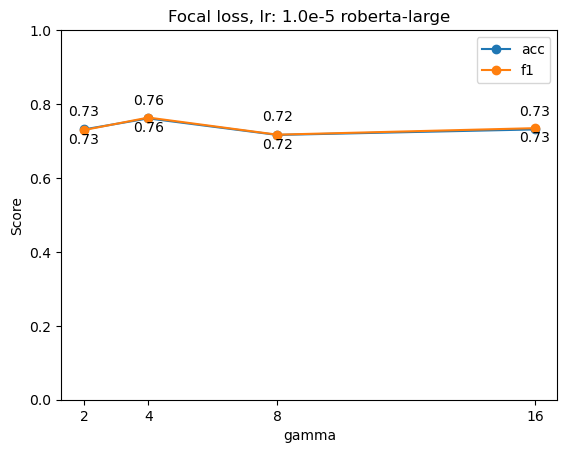

In [18]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='g', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["g"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["g"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['g'], [val for val in df['g']], ha='center')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, lr: 1.0e-5 {model_checkpoint}')